In [1]:
%load_ext autoreload
%autoreload 2
import cv2

participant_number = '3'
video_path = f"./datasets/MIT/Videos/P{participant_number}.avi"


cap = cv2.VideoCapture(video_path)

In [2]:
from models.frame import Frame
from typing import List
import random

frames: List[Frame] = []
cap = cv2.VideoCapture(video_path)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(Frame(len(frames), participant_number, frame))
cap.release()
num_selected_frames = 20
frames_selection = random.sample(frames, num_selected_frames)

# Face

In [3]:
from utils.face_analyzer import FaceAnalyzer

face_analyzer = FaceAnalyzer()
for frame in frames_selection:
    frame.face = face_analyzer.get_face(frame.image)

# Smile

In [4]:
for frame in frames_selection:
    frame.smile = face_analyzer.get_smile(frame.image, frame.face) if frame.face is not None else None

# Facial Interest Points

In [5]:
for frame in frames_selection:
    frame.facial_landmarks = face_analyzer.get_face_interest_points(frame)

# Selected Facial Features

In [6]:
for frame in frames_selection:
    if frame.facial_landmarks:
        frame.selected_facial_landmarks = face_analyzer.get_selected_facial_features(frame.facial_landmarks)

# Display Frames

In [8]:
for frame in frames_selection:
    face_analyzer.get_head_pose_using_mediapipe(frame.image)

I0000 00:00:1739880497.505444  405255 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1
W0000 00:00:1739880497.519172  406665 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739880497.531192  406665 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739880497.537557  406668 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
I0000 00:00:1739880520.201584  405255 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1
W0000 00:00:1739880520.206397  406878 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739880520.2158

: 

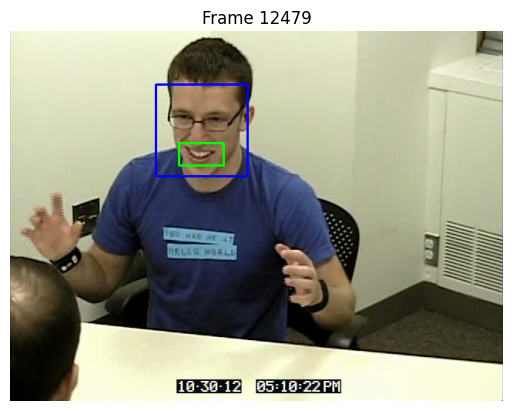

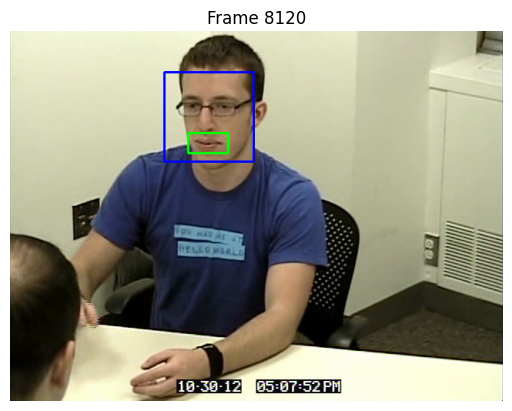

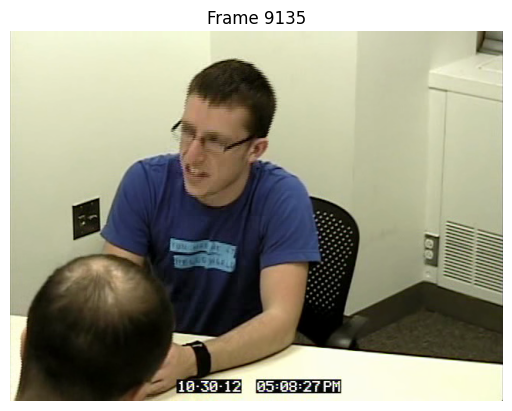

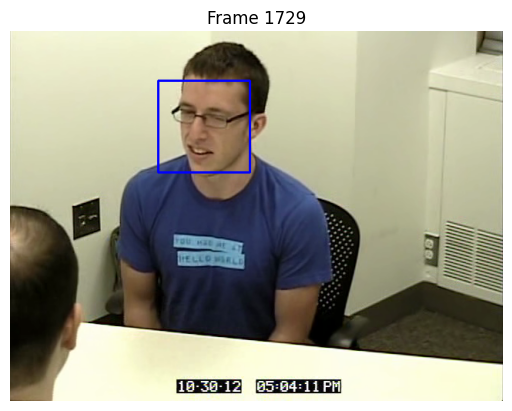

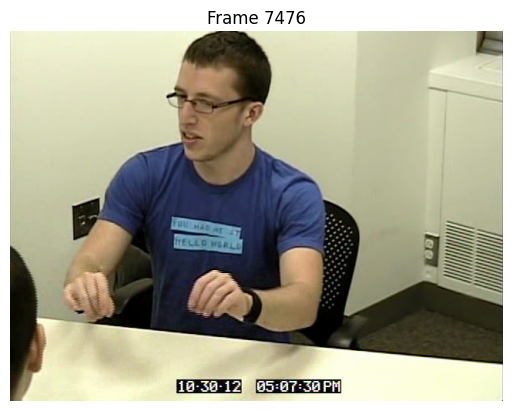

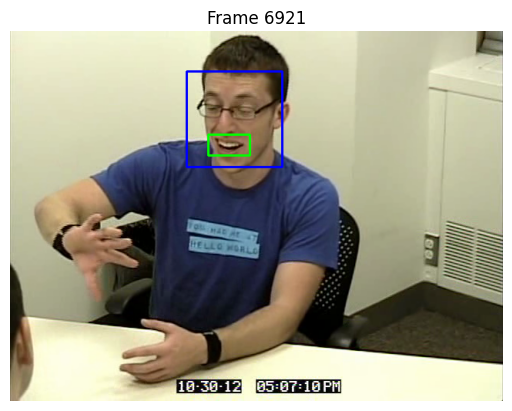

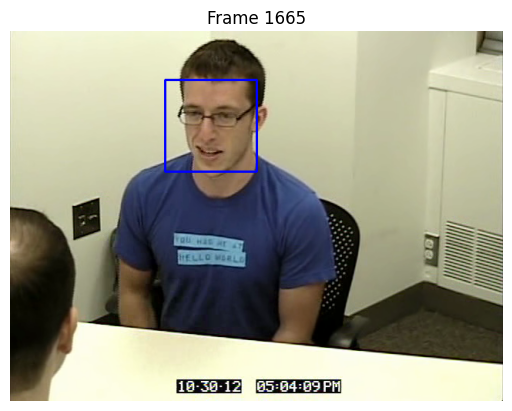

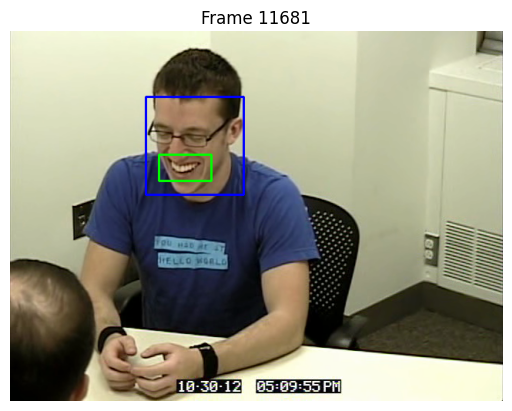

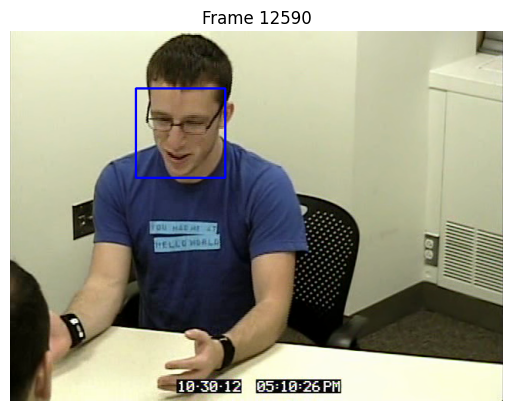

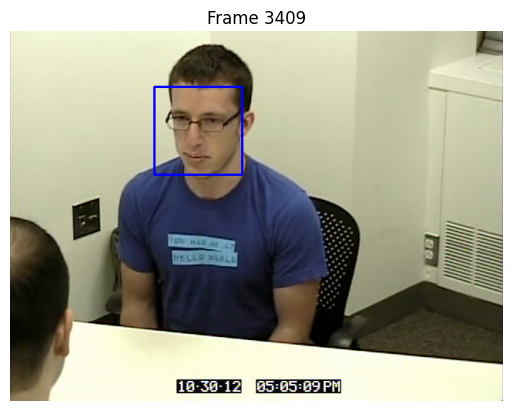

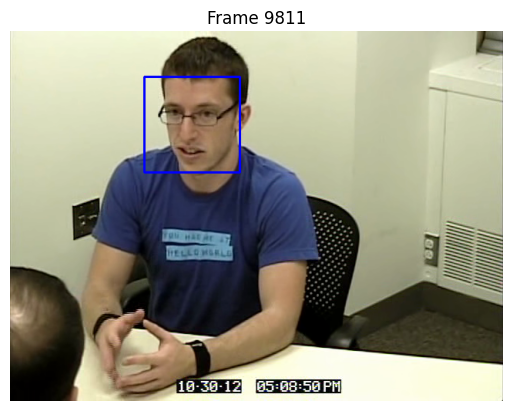

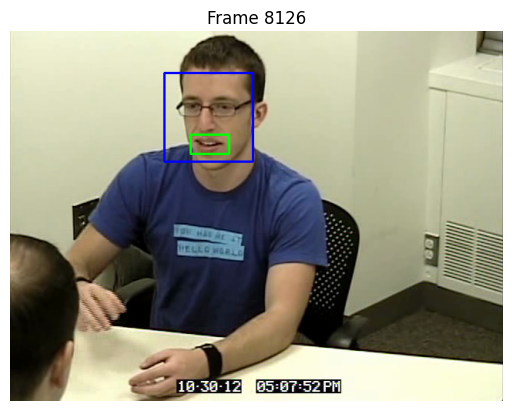

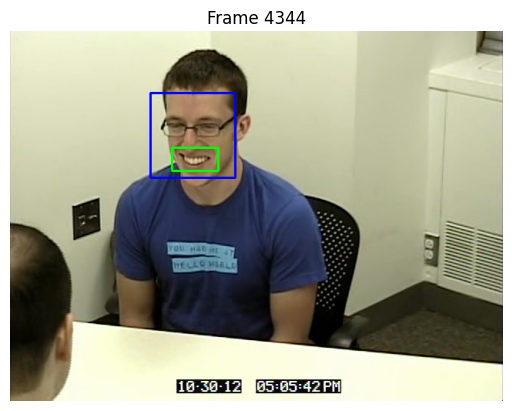

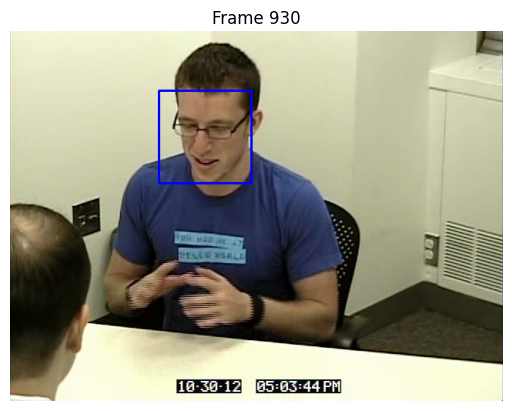

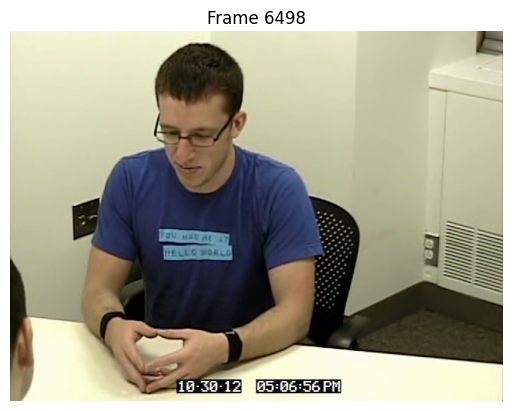

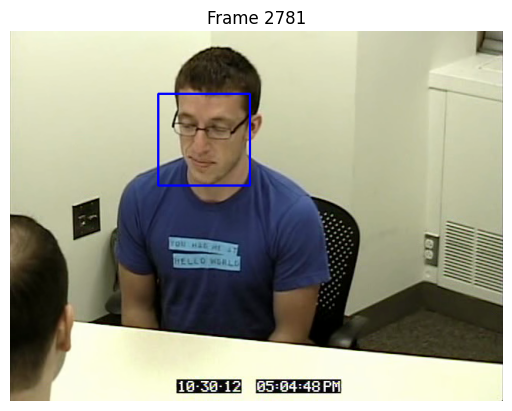

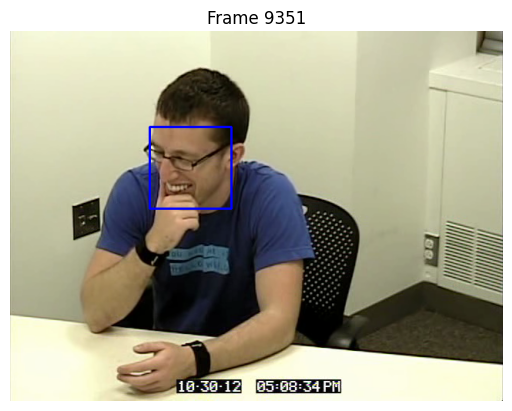

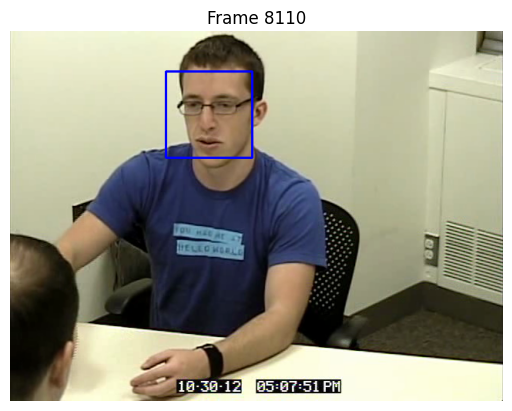

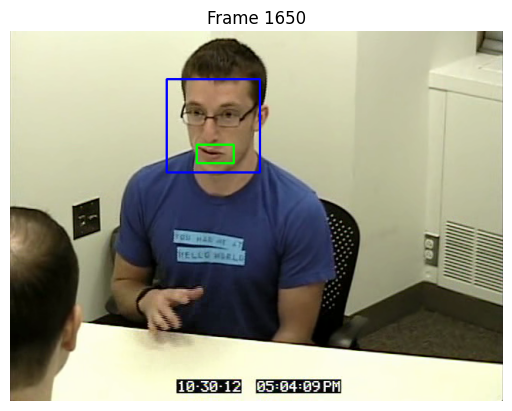

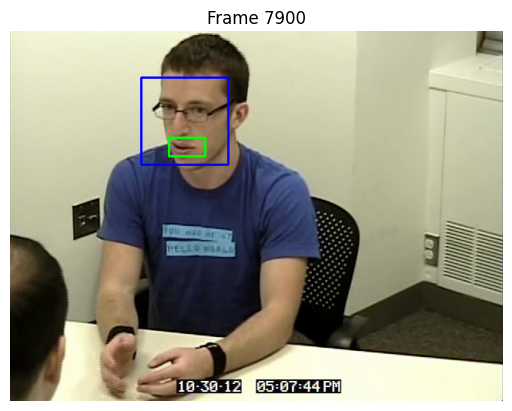

In [16]:
for frame in frames_selection:
    frame.reset_drawable_image()
    frame.draw_face()
    frame.draw_smile()
    # frame.draw_selected_facial_landmarks()
    # frame.draw_facial_landmarks()
    frame.display()